In diesem Programm wird die Gleichgewichtsverteilung, die im C-Programm vis-gen.c hergestellt wurde, visualisiert. Das pythonprogramm das gegeben wurde, lädt die Positionen von vertikalen und horizontalen Teilchen, die in separaten Dokumenten abgelegt wurden und stellt es graphisch durch patches dar.
Ich habe das Programm angepasst, dass es einen zeiltichen Verlauf von Updates darstellen kann. Bringt allerdings nicht so viel, da sich auf kurzen Zeitskalen im Gleichgewicht kaum etwas ändert.


In [119]:
import random
import numpy as np
# import pandas as pd
# Daten werden erstmal geladen und in arrays gesteckt
L = 8
M = 64
store_lat = []
store_p_v =[]
store_p_h =[]

i=0
with open("vis_seed.txt","r") as file:
    for line in file:
        if (i<M):
            store_lat.append([int(x) for x in line.split()])
            i+=1
        elif( i>=M and i <(M*M/L+M)):
            store_p_v.append([int(x) for x in line.split()])
            i+=1
        elif(i>=(M*M/L+M) and i<(M*M/L*2+M)):
            store_p_h.append([int(x) for x in line.split()])
            i+=1
        elif (i==(M*M/L*2+M)): 
            (v_numb, h_numb, z) = (int(line.split()[0]),int(line.split()[1]),float(line.split()[2]))
        
lat = np.array(store_lat)
h_particles = np.array(store_p_h)
v_particles = np.array(store_p_v)

z = float(z)
v_numb= int(v_numb)
h_numb = int(h_numb)
        
    

        


In [120]:
print(i)
M*M/L*2+M-1
z

1088


0.56

In [86]:
# Die c funktion für das Monte-Carlo Update wurden 1 zu 1 auf python übertragen
def del_occ(lat, x_pos,y_pos,a):

    if (a==0):
    
        for i in range(L):
        
                
            lat[(x_pos+i)%M,y_pos]=0
        
        
    if ( a==1):
        
        for i in range(L):
        
                
            lat[x_pos][(y_pos+i)%M]=0
    return lat
        
    

    
def ins_occ(lat, x_pos,y_pos,a):

    if (a==0):
    
        for i in range(L):
        
                
            lat[(x_pos+i)%M,y_pos]=-1
        
        
    if ( a==1):
        
        for i in range(L):
        
                
            lat[x_pos][(y_pos+i)%M]=1
    return lat
    

def occ_check(lat,ps,a):

    result =0
    if (a==0):
    
        for i in range(L):
    
            
            result += lat[(ps[0]+i)%M,ps[1]]*lat[(ps[0]+i)%M,ps[1]]
    
    
    elif ( a==1):
    
        for i in range(L):
    
            
            result += lat[ps[0],(ps[1]+i)%M]*lat[ps[0],(ps[1]+i)%M]
    

    return result

def sweep(p_v, p_h,occ_lat,zet,ho_numb,ver_numb,proto):

    
    if random.random()<(1/2):

    
        
        
        if ((random.random())<(((ver_numb)+(ho_numb))/(2*(M*M)*zet))):
        
            proto += 1
            del_part = int(random.random()*((ver_numb)+(ho_numb)))
            if (del_part<(ho_numb)):
            
                if (ho_numb>0):
                
                
                    occ_lat = del_occ(occ_lat,p_h[del_part,0],p_h[del_part,1],1)
                    ho_numb -= 1
                    for i in range(del_part,ho_numb):
                
                        p_h[i,0]=p_h[i+1,0]
                        p_h[i,1]=p_h[i+1,1]
                
                
        
            else:
        
                if (ver_numb>0):
            
                    occ_lat = del_occ(occ_lat,p_v[del_part-(ho_numb),0],p_v[del_part-(ho_numb),1],0)
                    ver_numb -= 1
                    for i in range(del_part,ho_numb):
            
                        p_v[i,0]=p_v[i+1,0]
                        p_v[i,1]=p_v[i+1,1]
            

    
    else:
    
        ins_pos = int(random.random()*(M*M))
        pos = np.array([int((ins_pos-ins_pos%M)/M),ins_pos%M])
        if (random.random()<(1/2)):
        
            if (occ_check(occ_lat,pos,1)==0):
            
                
                # muss die alpha Übergangsrate nicht auswerten, da sie immer 1 ist.
                p_h[ho_numb,0] = pos[0]
                p_h[ho_numb,1] = pos[1]
                occ_lat = ins_occ(occ_lat,pos[0],pos[1],1)
                ho_numb += 1

            
        
        else:
        
            if (occ_check(occ_lat,pos,0)==0):
            
                # muss die alpha Übergangsrate nicht auswerten, da sie immer 1 ist.
                p_v[ver_numb,0] = pos[0]
                p_v[ver_numb,1] = pos[1]
                ins_occ(occ_lat,pos[0],pos[1],0)
                ver_numb += 1

    return p_v, p_h,occ_lat,ho_numb,ver_numb,proto


In [17]:
# mit dieser Zelle habe ich die Funktionstüchtigkei der insertion Funktion getestet. Kann ignoriert werden.
check_lat = np.zeros_like(lat)
for i in range(h_numb):
    check_lat= ins_occ(check_lat,h_particles[i,0],h_particles[i,1],1)
    
for p in range(v_numb):
    check_lat = ins_occ(check_lat,v_particles[p,0],v_particles[p,1],0)
    

check = 0
for i in range(M):
    for j in range(M):
        if (check_lat[i,j]!=lat[i,j]):
            check +=1

check
with open("check.txt","w") as f:
    for i in range(64):
        for j in range(64):
            if (j!=63):
                f.write(f"{check_lat[i,j]}\t")
                
            else:
                f.write(f"{check_lat[i,j]}\n")

    

## Gitter wird dargestellt

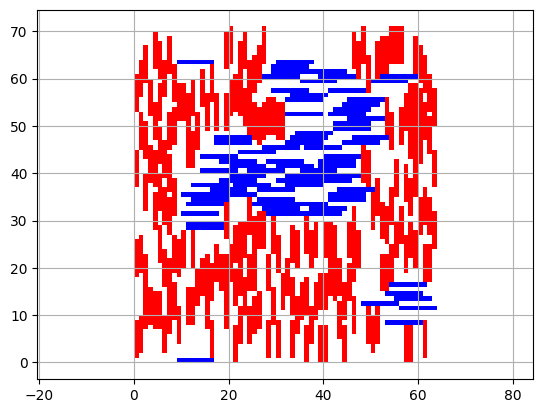

0
48


In [121]:

import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mpl_toolkits.mplot3d import Axes3D
from IPython.display import clear_output
import time
from copy import deepcopy
# ax = fig.add_subplot(111,aspect='equal')
# in der sweep Funktion ist immer noch ein Löschprotokoll enthalten, ignorieren
prot = 0
check_protokoll = 0
# lat = np.zeros_like(lat)
# v_particles = np.zeros_like(v_particles)
# h_particles = np.zeros_like(h_particles)
# h_numb =0
# v_numb =0
for i in range(50):
    # figure wird immer wieder gelöscht und upgadated
    clear_output(wait=True)
    fig, ax = plt.subplots(1,1)
    
    # patches für vertikale Stäbchen werden erstellt
    for n in range(v_numb):
        ax.add_patch(
                patches.Rectangle(
                    (v_particles[n,0], v_particles[n,1]),
                    L,
                    1,
                    facecolor="blue",
                    linewidth=0.3))
        
        # print(f"{n}: {(v_particles[n,0], v_particles[n,1])}")
        
        
        
    # patches für horizontale Stäbchen werden erstellt
    for n in range(h_numb):
        ax.add_patch(
                patches.Rectangle(
                    (h_particles[n,0], h_particles[n,1]),
                    1,
                    L,
                    facecolor="red",
                    linewidth=0.3))
        
        # print(f"{n}: {(h_particles[n,0], h_particles[n,1])}")
        
    
    plt.axis('equal')
    plt.grid()
    plt.show()
    check_lat = deepcopy(lat)
    v_particles,h_particles,lat,h_numb,v_numb, prot = sweep(v_particles,h_particles,lat,z,h_numb,v_numb,prot)

    # hier wird gecheckt, ob sich durch den sweep Schritt etwas verändert hat.
    check = 0
    for i in range(M):
        for j in range(M):
            if (check_lat[i,j]!=lat[i,j]):
                check +=1
    # es wird protokolliert wie oft sich etwas ändert
    check_protokoll+=check
    print(check)
    # damit die Bilder nicht zu scnell wechseln
    time.sleep(0.1)
    plt.close()
print(check_protokoll)
    